<a href="https://colab.research.google.com/github/suryaWHJr/1/blob/main/122_digit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Image Classification

We have already seen how powerful openCV can be, and we also know how to use it now. ***CV stands for computer vision***.

We also know how Logistic Regression could be used to separate different outcomes. We have learnt about binary logistic regression where the outcome is always in True or False, but what if it's not?

Don't worry! We got you covered. Today, we are going to see how we can make our computer detect a hand-written number.

\
To get started, let's first import all the libraries that we will require to do this.

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Let's go through these libraries one by one -


1.   `import cv2` - This is the library with which we are going to use our computer's camera.
2.   `import numpy as np` - This is so that we can perform complex mathematical/list operations
3.   `import pandas as pd` - This is so that we can treat our data as DataFrames. We already know how helpful they are.
4.   `import seaborn as sns` - This is a python module to prettify the charts that we draw with `matplotlib`. We have used it a couple of times.
5.   `import matplotlib.pyplot as plt` - This library is used to draw the charts.
6.   `from sklearn.datasets import fetch_openml` - This function allows us to retrieve a data set by name from OpenML, a public repository for machine learning data and experiments
7.   `from sklearn.model_selection import train_test_split` - This is to split our data into training and testing.
8.   `from sklearn.linear_model import LogisticRegression` - This is for creating a LogiticRegression Classifier
9.   `from sklearn.metrics import accuracy_score` - This is to measure the accuracy score of the model.











In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(pd.Series(y).value_counts())
classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '9']
nclasses = len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64


Here, we are using a dataset from OpenML where we have 70,000 images of hand-written digits.

\
Let's go through this code line by line -

\
As we know, we can represent any given image in the form of binary. Here in the first line of code -

`X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`

We are fetching the dataset of images of handwritten digits from the OpenML datasets. The `X` here would be the data of images represented in Binary, while `y` would be the label of that image, i.e - 0, 1, 2, ..., 9

With the second line of code, `print(pd.Series(y).value_counts())` it tells us the count of samples for each of the label. Here, we can see that label 1 has 7,877 samples, 2 has 6,990 samples and so on.

Finally, we are creating a list that contains all the labels. Let's move on to the next chunk of code and explore how these samples look like

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

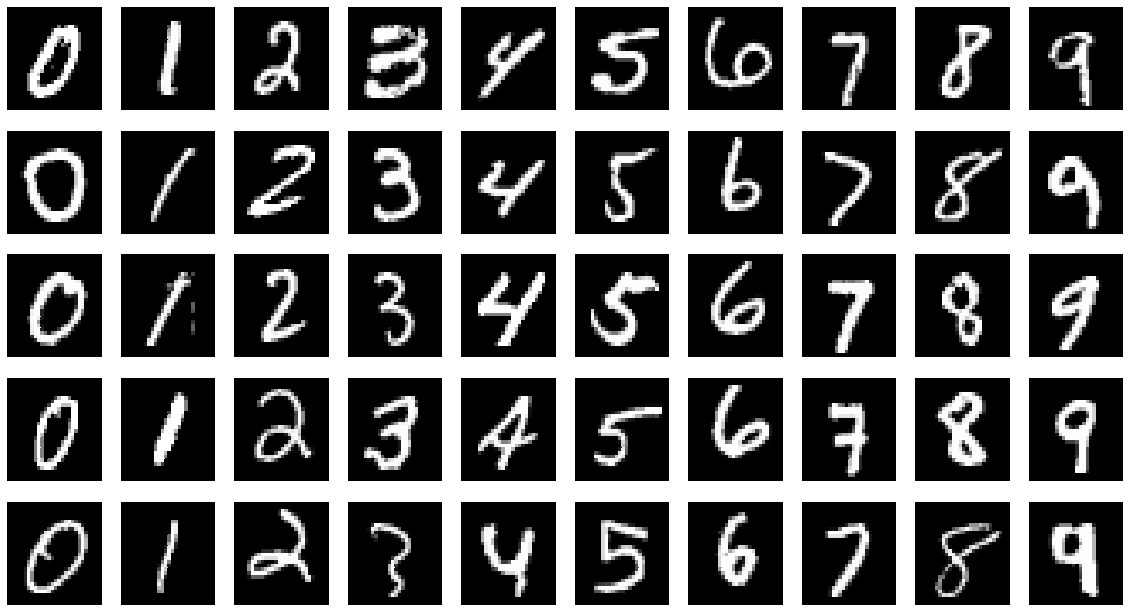

In [ ]:
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.array(X.loc[idx]).reshape(28,28), cmap=plt.cm.gray, 
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

idxs = np.flatnonzero(y == '0')
print(np.array(X.loc[idxs[0]]))

Here, we are representing 5 samples of each of the labels. Let's break this down line by line.

\
With the first line of code - We are saying that we want to display 5 samples per labels.

\
Next, with `figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))`, we are setting up the total size of the figure that we plotted above.

\
Now we get into a loop where we are iterating over the classes that we created earlier, which was a list of all the labels (0, 1, 2, ..., 9)

\
We are first filtering out all the indexes of the elements with value equal to our label with `idxs = np.flatnonzero(y == cls)` and then we are selecting any 5 random indexes with `np.random.choice(idxs, samples_per_class, replace=False)`

\
We are then iterating over these random indexes for the given label. First, we are doing `plt_idx = i * nclasses + idx_cls + 1` to define the position of the given label. Here, the `idx_cls` acts as the column while `i` acts as the rows. For all the samples of label 0 that we are plotting, the column `idx_cls` would remain to be the same while the row `i` will change. This helps us form a grid of samples while plotting.

\
Now, we have the index of the random sample of the label, but how are we plotting it? We are creating a heatmap to plot the image with 

`p = sns.heatmap(np.reshape(X[idx], (28,28)), cmap=plt.cm.gray, xticklabels=False, yticklabels=False, cbar=False);`

Here, we are taking the index `idx` and fetching it's element from `X`, and we are reshaping it in a 28*28 grid. Remember, images here are represented as binary. Let's cross verify the same for `X`.

In [ ]:
print(len(X))
print(len(X.loc[0]))

70000
784


Here, we can see that `X` has 70,000 image data and each image has 784 pixels of data, which is equivalent to `28*28`.

\
Now let's prepare the data by splitting it and train a Logistic Regression Model but before that, let's check the array of a particular image.

As we can see, the given label we printed is 5, and we can also make out 5 from the array printed above. The maximum values we have in this array could be 255 (Array consists of numbers from 0 to 255).

\
To scale these values, we will have to divide it by 255 so that all the features of an image could be represented with values between 0 and 1.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=7500, test_size=2500)

#scaling the features
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
print(X.loc[0])
print(y.loc[0])

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64
5


Here, we are going to use a total of 10000 samples since computing 70,000 samples might take a lot of time. For this, we have split our data into 7500 for training and 2500 for testing.

\
We then simply divide our training and testing data by 255 to scale it and have values between 0 and 1. Let's train a Logistic Regression model with this data.

In [ ]:
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Until now, we were dealing with binary logistic regressions, but here, we have 10 labels, 0 to 9. For this, we write `multi_class='multinomial'` to specify that this is a `multinomial` logistic regression.

\
Generally, there is a solver involved in all the logistic regressions, and the default solver is `liblinear`, which is highly efficient for linear logistic regression. This is also efficient with binary logistic regressions that we learnt earlier. For `multinomial` logistic regression, `solver='saga'` is highly efficient. It works well with large number of samples and supports `multinomial` logistic regressions, like this one.

\
Now that we have built a model, let's see how well it performs -

In [ ]:
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9004


We have an accuracy score of 90.04%. Looks like an extremely efficient model. Let's check how it's confusion matrix looks like -

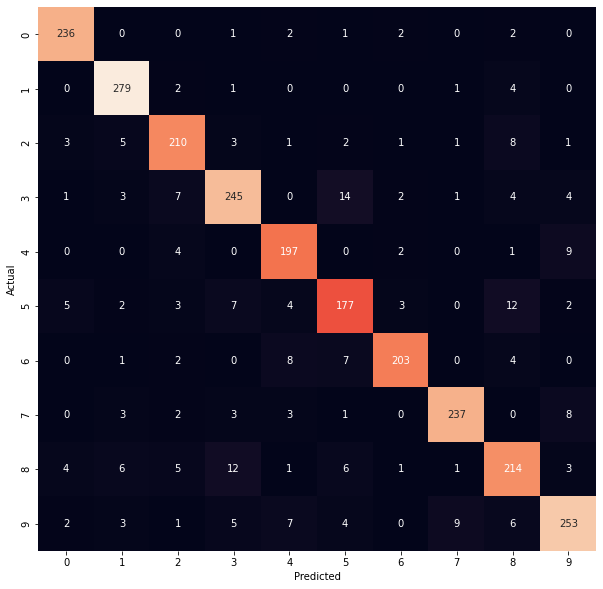

In [ ]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)

Here, we are creating an array with `cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])` and setting it's size to be 10*10.

\
We are finally plotting the graph with sns, which is used to prettify the charts that we draw with matplotlib.

\
Finally, it's time to integrate our code with our camera, so that our model can detect the digit we write on a piece of paper using the model we just trained.

\
For that, we'll have to switch back to our devices and do the same.